In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.model_selection import StratifiedKFold

from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_percentage_error, f1_score, roc_curve, roc_auc_score
from statistics import mean, stdev
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabet = pd.read_csv(url, names=names)
data = diabet.copy()
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
diabet.info()
diabet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
diabet.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [27]:
# sns.pairplot(diabet[names], hue = 'Outcome')
<img src='output.png' width=1280, heigth=960>

SyntaxError: invalid syntax (1603869519.py, line 2)

In [ ]:
data.drop(['Outcome'], axis=1, inplace=True)
data.drop(['BloodPressure'], axis=1, inplace=True)
data.drop(['SkinThickness'], axis=1, inplace=True)
X = data
y = diabet.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
#scaler = MinMaxScaler().fit(X_train)
scaler = StandardScaler().fit(X_train)
#scaler = PowerTransformer().fit(X_train)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print ("Accuracy: ", format(accuracy_score(y_test, predictions), ".10f"))
print (classification_report(y_test, predictions))

Accuracy:  0.8116883117
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       100
           1       0.77      0.67      0.71        54

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



In [ ]:
# Homework 17 
# обучить ансамбль моделей с использованием перекрестной проверки
import joblib

N_CORES = joblib.cpu_count(only_physical_cores=True)
print(f"Number of physical cores: {N_CORES}")

print(f"diabetshape: {diabet.shape}")

def ensamble():
    models = {}
    metrics = []
    #penalties = ['l1', 'l2']
    for i in range(1, 34):
        models[i]=RidgeClassifier(alpha=1)
        models[i].fit(X_train[:-i*18,:], y_train[:-i*18])
        y_pred = models[i].predict(X_test)
        metrics.extend([accuracy_score(y_test, y_pred)])
    return metrics
    
#for penalty in penalties:
#    linear_svc = LinearSVC(penalty=penalty, dual=False)
#    linear_svc.fit(X_train, y_train)
#    y_pred = linear_svc.predict(X_test)
#    print(f"Accuracy using {penalty} penalty: {accuracy_score(y_test, y_pred)}")

Number of physical cores: 4
diabetshape: (768, 9)


In [ ]:
def cross_validation():       
      X_scaled = scaler.fit_transform(X)
      skf = StratifiedKFold(n_splits=34, shuffle=False)
      metrics = []
      n = 1

      fig = plt.figure("Metrics vs Steps", figsize=(8,6))
      ax = fig.add_subplot()

      for train_index, test_index in skf.split(X, y):
            X_train, X_test = X_scaled[train_index], X_scaled[test_index]
            y_train, y_test = y[train_index], y[test_index]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            metrics.append(accuracy_score(y_test, y_pred))
            y_pred_proba = model.predict_proba(X_test)[::,1]
            fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
            auc = roc_auc_score(y_test, y_pred_proba)
            n += 1
            ax.plot(fpr,tpr,label=f"data {n}, auc="+str(auc))
      plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad=0)
      plt.show()
            
      return metrics

def Metrics_vs_Steps(metrics):
    fig = plt.figure("Metrics vs Steps", figsize=(8,6))
    ax = fig.add_subplot()
    ax.plot(range(len(metrics)), metrics)
    plt.title('Metrics vs Steps')
    plt.xlim([1, 34])
    plt.xticks(np.arange(1, 35, 2))
    plt.yticks(np.arange(0.5, 1.005, 0.05))
    plt.ylabel('Accuracy_score')
    plt.xlabel('Steps')
    plt.show()

def accuracy_out(metrics):
      for i in range(len(metrics)):
            print(f"Step - {i}")
            print(f"accuracy_score: {metrics[i]}")
      print("-------------------------------------------------------\n")

      print('\nMaximum Accuracy That can be obtained from this model is:',
            max(metrics)*100, '%')
      print('\nMinimum Accuracy:',
            min(metrics)*100, '%')
      print('\nOverall Accuracy:',
            mean(metrics)*100, '%')
      print('\nStandard Deviation is:', stdev(metrics))
      print('\n========================================================')
      

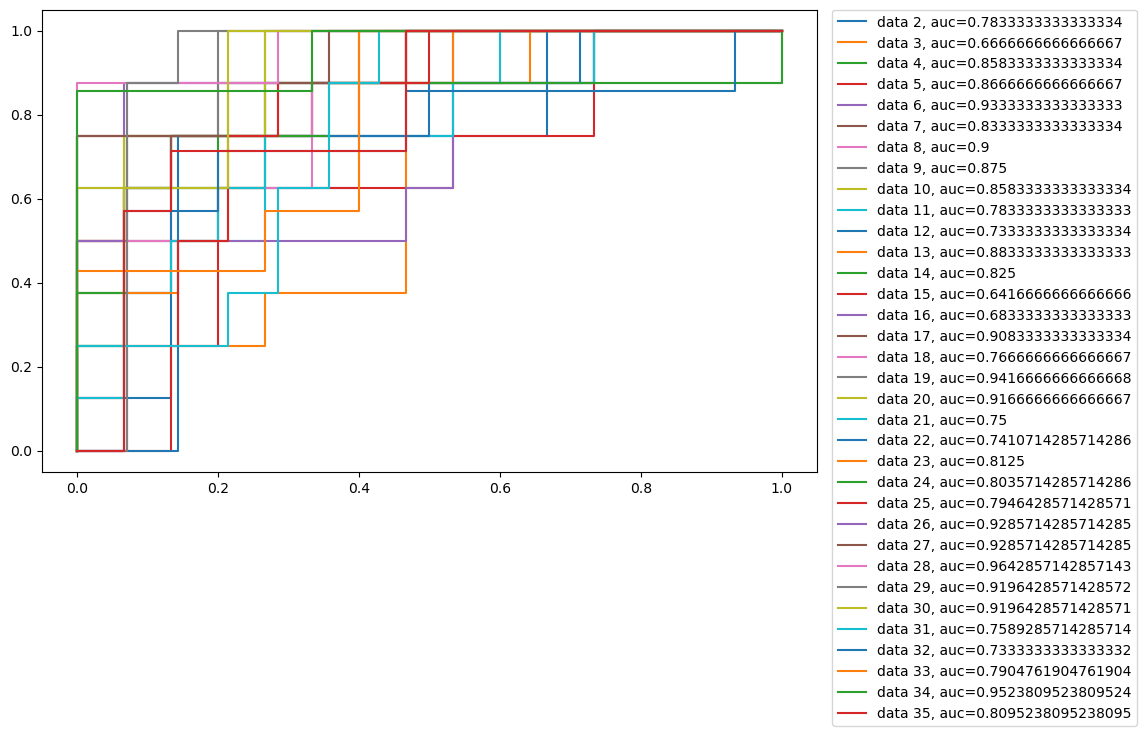

In [ ]:

metrics_cv = cross_validation()
metrics_ensamble = ensamble()

Step - 0
accuracy_score: 0.8181818181818182
Step - 1
accuracy_score: 0.8116883116883117
Step - 2
accuracy_score: 0.8116883116883117
Step - 3
accuracy_score: 0.8116883116883117
Step - 4
accuracy_score: 0.8116883116883117
Step - 5
accuracy_score: 0.8051948051948052
Step - 6
accuracy_score: 0.8116883116883117
Step - 7
accuracy_score: 0.8051948051948052
Step - 8
accuracy_score: 0.8051948051948052
Step - 9
accuracy_score: 0.8116883116883117
Step - 10
accuracy_score: 0.8116883116883117
Step - 11
accuracy_score: 0.8116883116883117
Step - 12
accuracy_score: 0.8051948051948052
Step - 13
accuracy_score: 0.8181818181818182
Step - 14
accuracy_score: 0.8246753246753247
Step - 15
accuracy_score: 0.8116883116883117
Step - 16
accuracy_score: 0.8116883116883117
Step - 17
accuracy_score: 0.8116883116883117
Step - 18
accuracy_score: 0.8181818181818182
Step - 19
accuracy_score: 0.8116883116883117
Step - 20
accuracy_score: 0.8116883116883117
Step - 21
accuracy_score: 0.8116883116883117
Step - 22
accuracy_s

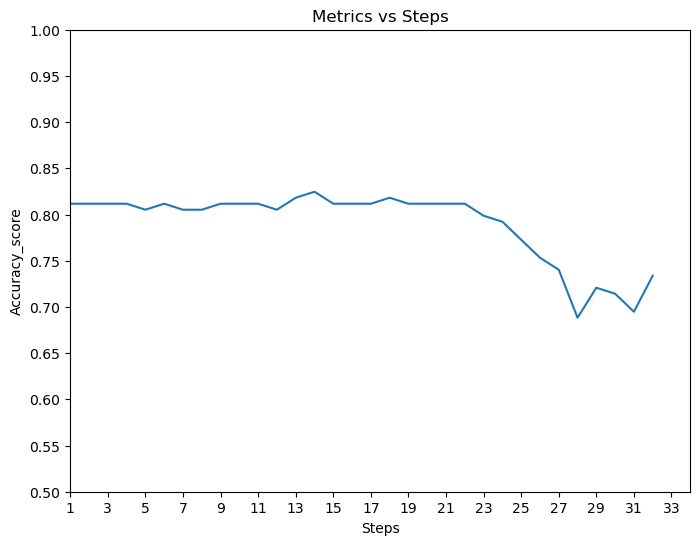

In [ ]:
accuracy_out(metrics_ensamble)
Metrics_vs_Steps(metrics_ensamble)

Step - 0
accuracy_score: 0.782608695652174
Step - 1
accuracy_score: 0.5652173913043478
Step - 2
accuracy_score: 0.782608695652174
Step - 3
accuracy_score: 0.7391304347826086
Step - 4
accuracy_score: 0.8260869565217391
Step - 5
accuracy_score: 0.8260869565217391
Step - 6
accuracy_score: 0.8260869565217391
Step - 7
accuracy_score: 0.8260869565217391
Step - 8
accuracy_score: 0.782608695652174
Step - 9
accuracy_score: 0.7391304347826086
Step - 10
accuracy_score: 0.6956521739130435
Step - 11
accuracy_score: 0.7391304347826086
Step - 12
accuracy_score: 0.7391304347826086
Step - 13
accuracy_score: 0.6521739130434783
Step - 14
accuracy_score: 0.6956521739130435
Step - 15
accuracy_score: 0.8260869565217391
Step - 16
accuracy_score: 0.782608695652174
Step - 17
accuracy_score: 0.8695652173913043
Step - 18
accuracy_score: 0.8260869565217391
Step - 19
accuracy_score: 0.7391304347826086
Step - 20
accuracy_score: 0.7727272727272727
Step - 21
accuracy_score: 0.6818181818181818
Step - 22
accuracy_score

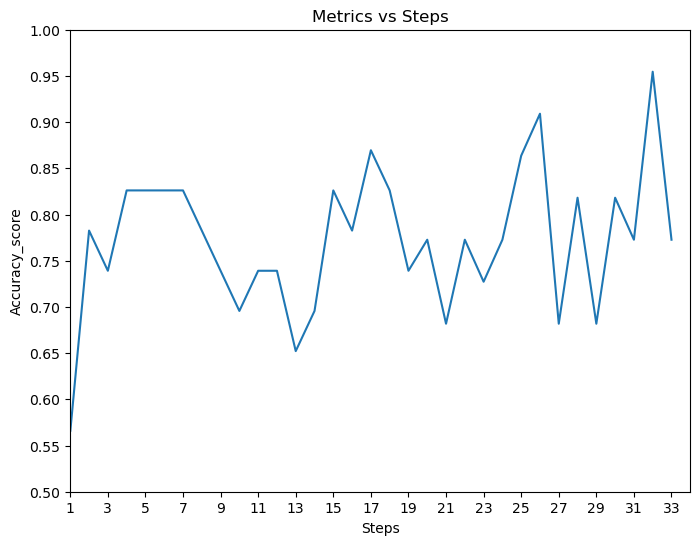

In [ ]:
accuracy_out(metrics_cv)
Metrics_vs_Steps(metrics_cv)